In [4]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

## Задание 1

Определить угол бросания для пули Б-32 пулемета НСВ-12.7 на дальность 2000м с точностью не хуже 0.01 д.у., если

\begin{equation} \nonumber
	\begin{split}
		g = 9.80665 \textit{м}/\textit{с}^2, \\
		d = 12.7 \textit{мм}, \\
		m = 48.3 \textit{г}, \\
		i = 1.0629, \\
		\nu_{15} = 820 \textit{м}/\textit{с}, \\
		P_0 = 750 \textit{мм.рт.с.}, \\
		T_0 = 15^\circ C, \\
		w = 0.5, \\
		z_t = 1.35 \cdot 10^{-3}, \\
		c_d = 0.0423, \\
		m_3 = 0.1744.
	\end{split}
\end{equation}
Здесь $m$ - масса пули. Повторить расчет для  $T = 5^\circ C$.

$\textbf{Указание:}$ перейти от независимой переменной $t$ к переменной $x$ (координата пули вдоль траектории).

In [46]:
g = 9.80665
d = 12.7 * 1e-3
m = 48.3 * 1e-3
ii = 1.0629
v_15 = 820
P_0 = 750
T_0 = 15
w = 0.5
z_t = 1.35e-3
c_d = 0.0423
m_3 = 0.1744

T_z = 15

In [47]:
S = np.pi*d*d/4
v_0 = v_15*(1 + z_t *(T_z - 15))

In [48]:
def T(y):
    return T_v - 0.0065*y


def ro(y):
    return 1.225*(T(y)/T_v)**4.256 * P_0/T_v * 288.15/760


def cx(x):
    pa = [0.0525, -0.9476, 8.9342, -9.4610, 0.3207, 4.2980, -1.9382]
    pb = [1.0000, -15.4071, 178.6690, -580.8643, 985.5873, -853.9492, 296.9213]
    pc = [0.0531, 0.9449, 90.5063, 0.1639]

    r = np.polyval(pa,x**2)/np.polyval(pb, x**2) + pc[0]/(1 + np.exp(-(x-pc[1])*pc[2])) + pc[3]
    return r


def a(y):
    return 340.294*(T(y)/288.15)**0.5


def F(v, y):
    return ii*S*ro(y)*v**2/2*cx(v/a(y))

In [49]:
def zero_index(u):
    u = np.array( [np.abs(u[i]) for i in range(len(u))] ) 
    return u.argmin()


def rad2dy(theta):
    return theta*3000/np.pi


def my_ode(a, x):
    
    u = a[0]
    gamma = a[1]
    t = a[2]
    y = a[3]
    
    v = u*np.sqrt(1 + gamma**2)
    
    dudx = -F(v,y)/m/v
    dgdx = -g/u**2
    dtdx = 1/u
    dydx = gamma
    
    return [dudx, dgdx, dtdx, dydx]#, dzdx, dqdx]


def shooting_method_theta(x, l):
    
  #  tol = np.pi/3000 * 1e-2
    
   # nums_theta = 30000
   # thetas = [i*tol for i in range(nums_theta)]
    
    thetas = np.linspace(0.03, 0.04, 1000)
    nums_theta = len(thetas)
    
    init = np.array([[ v_0*np.cos(theta), np.tan(theta), 0, 0 ] for theta in thetas])
    
    sol = [ odeint(my_ode, i, x) for i in init ]
    sol_for_y = [sol[i][:,3] for i in range(nums_theta)]
    y = [ sol_for_y[i][-1] for i in range(nums_theta)]
    
    tan_gamma = init.T[1]
    
    zero_ind = zero_index(y)
    theta = thetas[zero_ind]
    
    plt.figure(figsize=(18, 8))

    plt.plot(thetas, y,'g')

    plt.plot(theta,0,'bo',label = r"$\theta_0 = $" + str(theta),markersize = 10)

    plt.grid()
    plt.xlabel(r"$\theta$",fontsize = 17)
    plt.title(r"$y(L,0,\theta)$",fontsize = 17)
    plt.legend(loc = 'best', fontsize=17)
    
    print('theta = ' + str(rad2dy(theta)) + ' д.у.')
    
    return theta

### $T_0=15$

theta = 33.933936815389096 д.у.


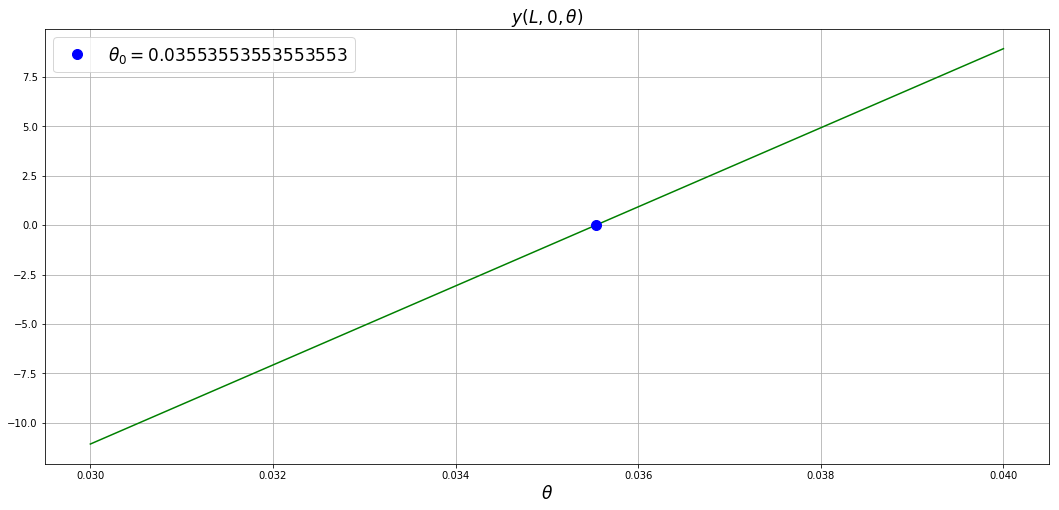

In [56]:
l = 2000
h = 1
N = round(l/h + 1)
T_0 = 15
T_v = (T_0 + 273.15)/(1 -3/8*12.7/P_0*w)

x = np.array([h*xx for xx in range(N)])

theta = shooting_method_theta(x,l)

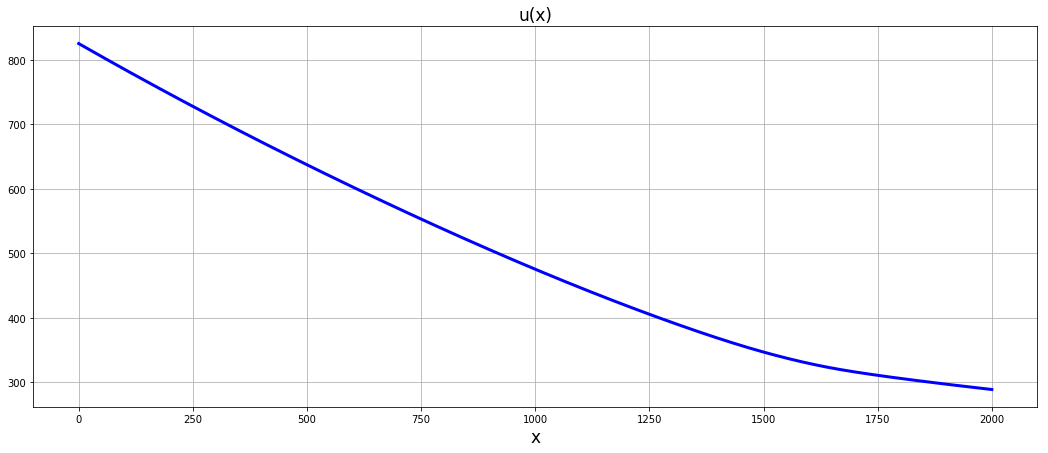

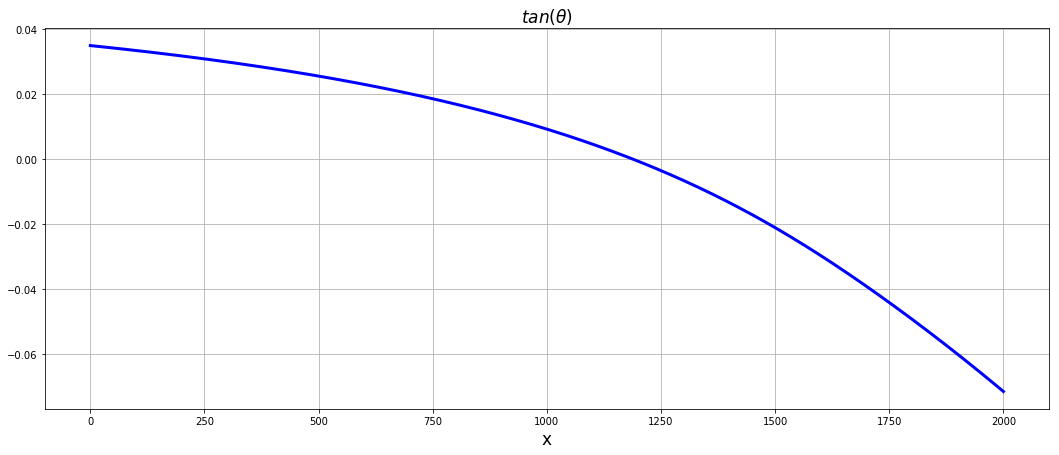

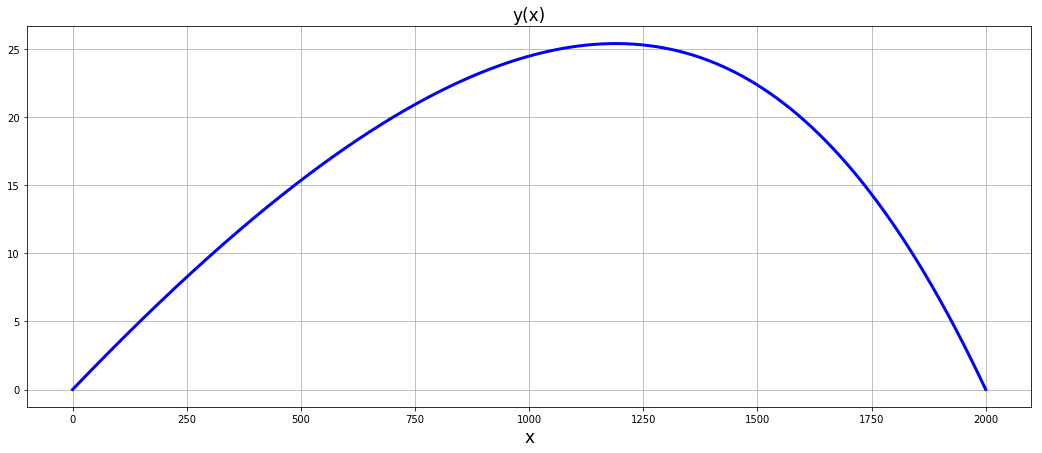

In [40]:
init = [ v_0*np.cos(theta), np.tan(theta), 0, 0 ]

sol = odeint(my_ode, init, x)

titles = ['u(x)', r'$tan(\theta)$', 't(x)', 'y(x)']

for i in [0,1,3]:

    plt.figure(figsize=(18, 7))
    plt.plot(x, sol[:,i],'b', linewidth=3  )

    plt.grid()
    plt.xlabel('x',fontsize = 17)
    plt.title(titles[i],fontsize = 17)

    plt.show()

### $T_0=5$

theta = 36.14203242224963 д.у.


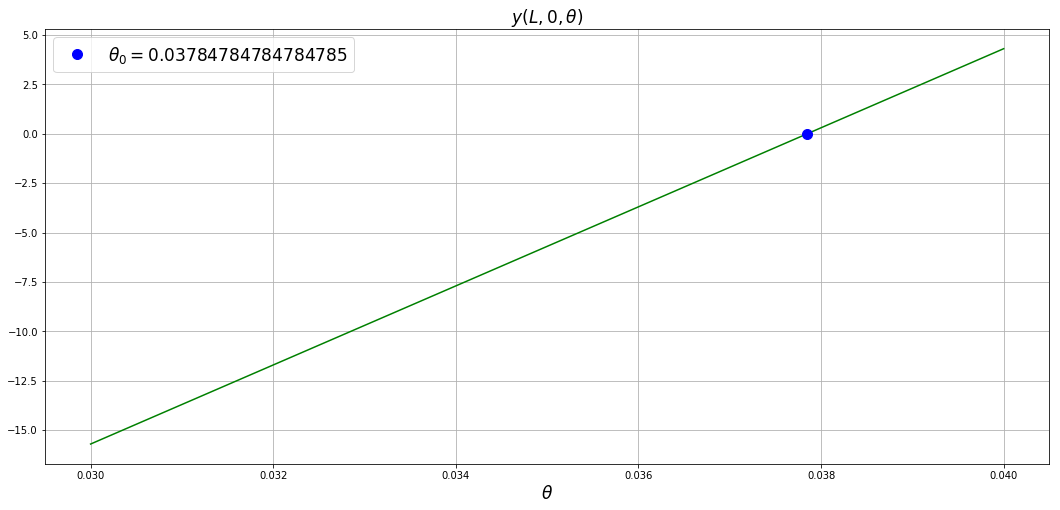

In [44]:
l = 2000
h = 1
N = round(l/h + 1)

T_0 = 5
T_v = (T_0 + 273.15)/(1 -3/8*12.7/P_0*w)

x = np.array([h*xx for xx in range(N)])

theta = shooting_method_theta(x,l)

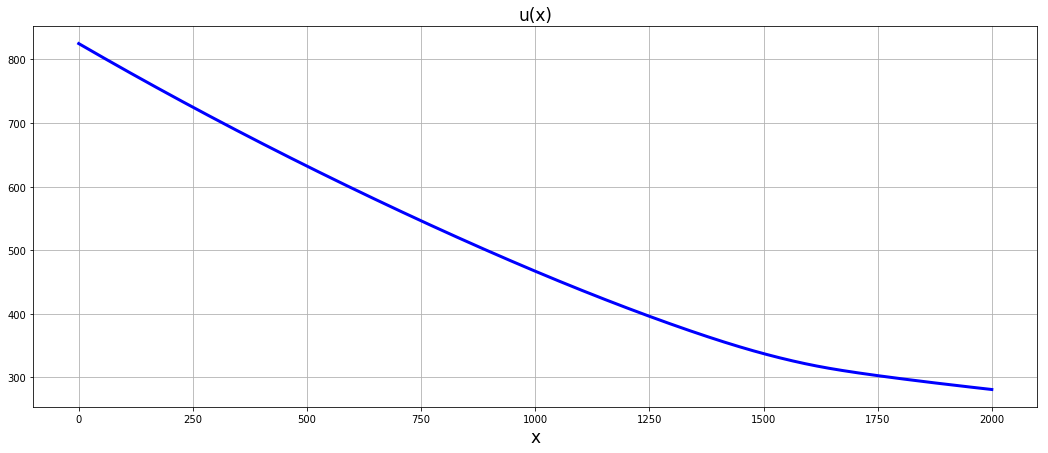

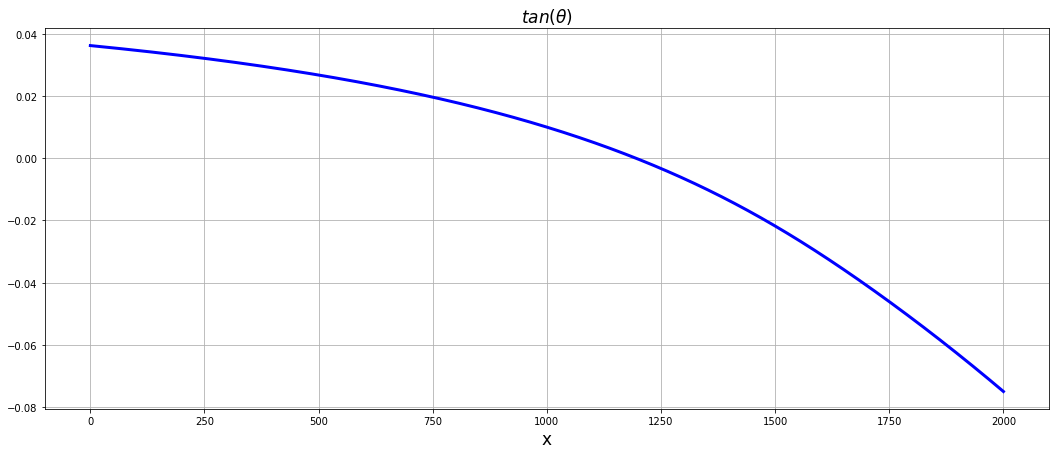

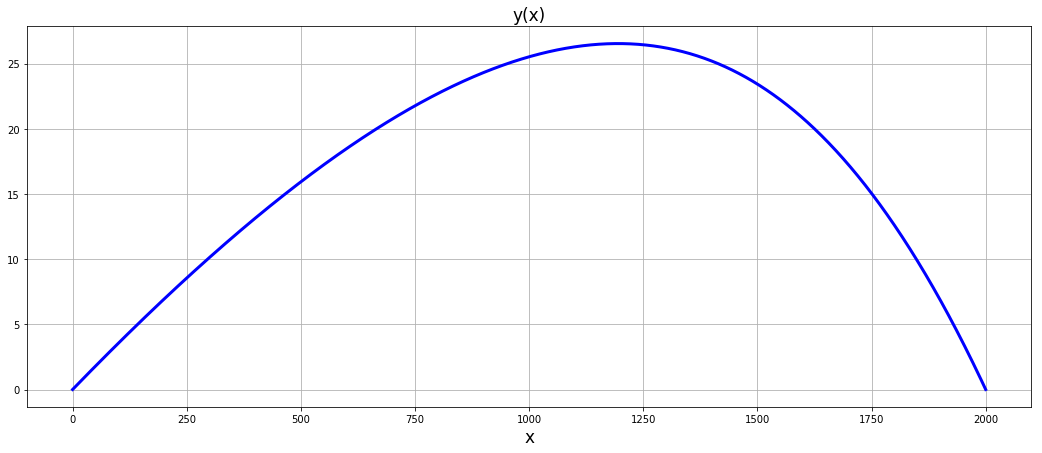

In [42]:
init = [ v_0*np.cos(theta), np.tan(theta), 0, 0 ]

sol = odeint(my_ode, init, x)

titles = ['u(x)', r'$tan(\theta)$', 't(x)', 'y(x)']

for i in [0,1,3]:

    plt.figure(figsize=(18, 7))
    plt.plot(x, sol[:,i],'b', linewidth=3  )

    plt.grid()
    plt.xlabel('x',fontsize = 17)
    plt.title(titles[i],fontsize = 17)

    plt.show()

 ## Задание 2
 Определить угол бросания и горизонтальную угловую поправку с учетом ветра и деривации в условиях предыдущей задачи ($T_0 = 15^\circ C$), если скорость ветра 10м/c, он дует справа налево перпендикулярно траектории, а деривация приводит к смещению пули вправо.

In [83]:
def my_ode_2(a, x):
    
    u = a[0]
    gamma = a[1]
    t = a[2]
    y = a[3]
    z = a[4]
    q = a[5]
    
    v = u*np.sqrt(1 + gamma**2)
    
    dudx = -F(v,y)/m/v
    dgdx = -g/u**2
    dtdx = 1/u
    dydx = gamma
    dzdx = q*u*np.pi*v_0*c_d
    dqdx = np.exp(-m_3*t)/v**2
    
    return [dudx, dgdx, dtdx, dydx, dzdx, dqdx]


def shooting_method_alpha(x, l, theta):
    
    alphas = np.linspace(-0.5, 0.5, 1000)
    nums_alphas = len(alphas)
    
    init = np.array([[ v_0*np.cos(theta), np.tan(theta), 0, 0, 0, 0 ] for alpha in alphas])
    
    sol = [ odeint(my_ode_2, i, x) for i in init ]
    sol_for_y = [sol[i][:,3] for i in range(nums_alphas)]
    y = [ sol_for_y[i][-1] for i in range(nums_alphas)]
    
    tan_gamma = init.T[1]
    
    zero_ind = zero_index(y)
    alpha = alphas[zero_ind]
    
    plt.figure(figsize=(18, 8))

    plt.plot(alphas, y, 'g')

    plt.plot(alpha, 0, 'bo',label = r"$\alpha_0 = $" + str(alpha),markersize = 10)

    plt.grid()
    plt.xlabel(r"$\alpha$", fontsize = 17)
    plt.title(r"$y(L,0,\alpha)$", fontsize = 17)
    plt.legend(loc = 'best', fontsize=17)
    
    print('alpha = ' + str(rad2dy(alpha)) + ' д.у.')
    
    return theta

alpha = -477.46482927568604 д.у.


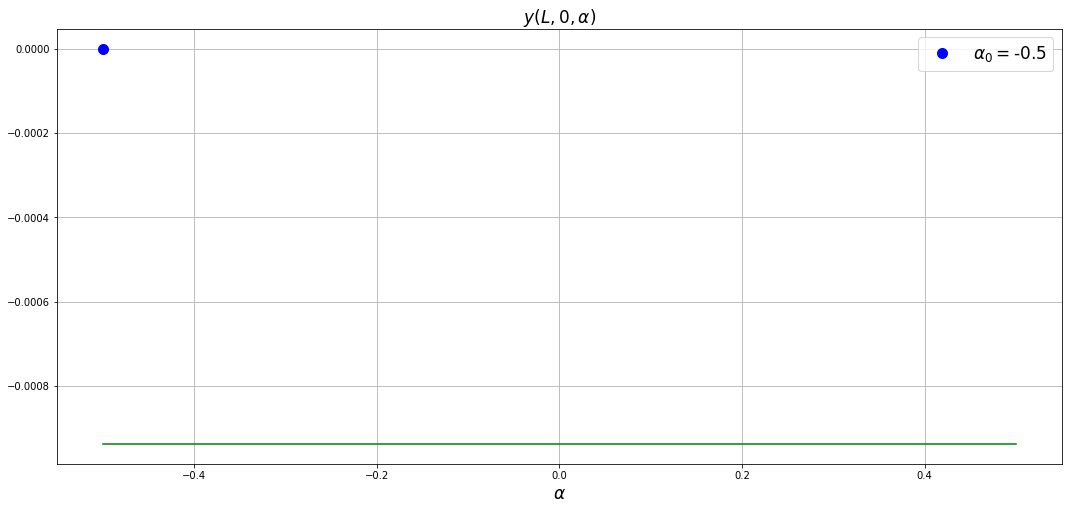

In [84]:
l = 2000
h = 1
N = round(l/h + 1)
T_0 = 15
T_v = (T_0 + 273.15)/(1 -3/8*12.7/P_0*w)

x = np.array([h*xx for xx in range(N)])

alpha = shooting_method_alpha(x,l, theta)

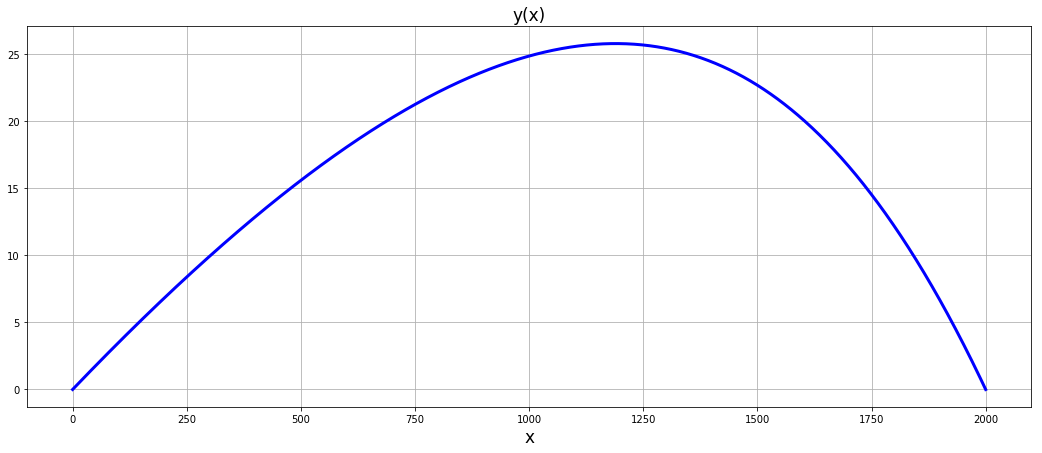

In [75]:
init = [ v_0*np.cos(theta), np.tan(theta), 0, 0, 0, 0]

sol = odeint(my_ode_2, init, x)

plt.figure(figsize=(18, 7))
plt.plot(x, sol[:,3],'b', linewidth=3  )

plt.grid()
plt.xlabel('x',fontsize = 17)
plt.title('y(x)',fontsize = 17)

plt.show()

 ## Задание 3
 Определить максимальную дальность полета в условиях 1 задания ($T_0 = 15^\circ C$).

In [85]:
def shooting_method_l(x, l):
    
    h = x[1]-x[0]
    nums_theta = 1000
    thetas = np.linspace(np.pi/6, np.pi/3.9, nums_theta, endpoint = True)
    
    init = np.array([[ v_0*np.cos(theta), np.tan(theta), 0, 0 ] for theta in thetas])
    
    sol = [ odeint(my_ode, i, x) for i in init ]
    
    sol_for_y = [sol[i][:,3] for i in range(nums_theta)]
    
    offset = int(len(x)/2)
    
    zero_ind = np.array([zero_index(y[offset:len(x)]) for y in sol_for_y])

    arg_max = zero_ind.argmax()
    
    print('theta =', str(rad2dy(thetas[arg_max])), 'д.у.')
    print('max_length =', (offset + zero_ind[arg_max])*h)
    
    return thetas[arg_max]

In [86]:
l = 6500
h = 0.1
N = round(l/h + 1)

T_0 = 15
T_v = (T_0 + 273.15)/(1 -3/8*12.7/P_0*w)

x = np.array([h*xx for xx in range(N)])

theta = shooting_method_l(x, l)

theta = 618.3106183106183 д.у.
max_length = 6034.3


In [19]:
print('theta =', str(theta*180/np.pi) + '°')

theta = 37.0986370986371°
